<img src = "img/BB.png"/>

### RSI (Releative strenth index)
- RSI = 100 – 100 / (1 + RS*)
- RS * = Avg of x days daily gain / Avg of x days daily loss 
- The gain is calculated on daily basis by taking price difference and considering positive change
- The loss is calculated on daily basis by taking price difference and considering negative change without sign

- RS* = average of gain / average of loss
    - gain >= 0
    - loss >= 0
    - average of gain >= 0
    - average of loss >= 0
    - RS* will be between 0 to 1
    - RS* will be greater than 1 and may be very big
    
    
- 100/(1 + RS*)
- (1 + RS*) 

    
- RSI = 100 - 100/(1 + RS*)
    - between 0 to 100 and center line can be 50
    

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from mod_my_utils.read_write_data import *

In [8]:
symbols = ["HDFC", 'RELIANCE', 'TCS', 'HINDUNILVR', 'INFY', 'HDFC', 'BHARTIARTL', 'ITC', 'ASIANPAINT', 'NESTLEIND', 'HCLTECH', 'SBI', 'SBIN']

In [9]:
symbol = symbols[0]
data_source = "yahoo"
# MM/DD/YYYY
start_date = "1/1/2010"
end_date = "1/1/2015"
print(start_date)
print(end_date)
print(symbol)


1/1/2010
1/1/2015
HDFC


In [10]:
stock_data = get_price_yahoo(symbol=symbol, data_source=data_source, start_date= start_date, end_date= end_date )

stock name HDFC


In [11]:
data = stock_data[["Adj Close"]].copy()
data.columns = ["price"]
data.head(5)

,price
Date,
2010-01-04,442.267761
2010-01-05,443.772614
2010-01-06,445.906067
2010-01-07,437.604248
2010-01-08,429.980499


In [12]:
data.head()

,price
Date,
2010-01-04,442.267761
2010-01-05,443.772614
2010-01-06,445.906067
2010-01-07,437.604248
2010-01-08,429.980499


### RSI computation

In [13]:
data['change'] = data['price'].diff(periods=1)
data.head()

,price,change
Date,,
2010-01-04,442.267761,NaN
2010-01-05,443.772614,1.504852
2010-01-06,445.906067,2.133453
2010-01-07,437.604248,-8.301819
2010-01-08,429.980499,-7.623749


In [14]:
data.head(20)

,price,change
Date,,
2010-01-04,442.267761,NaN
2010-01-05,443.772614,1.504852
2010-01-06,445.906067,2.133453
2010-01-07,437.604248,-8.301819
2010-01-08,429.980499,-7.623749
2010-01-11,429.988770,0.008270
2010-01-12,423.299347,-6.689423
2010-01-13,420.694733,-2.604614
2010-01-14,417.560883,-3.133850


In [15]:
data['gain'] = data['change']
data.head()

,price,change,gain
Date,,,
2010-01-04,442.267761,NaN,NaN
2010-01-05,443.772614,1.504852,1.504852
2010-01-06,445.906067,2.133453,2.133453
2010-01-07,437.604248,-8.301819,-8.301819
2010-01-08,429.980499,-7.623749,-7.623749


In [16]:
data.loc[data['gain'] < 0, ['gain']] = 0.0

In [18]:
data.head(20)

,price,change,gain
Date,,,
2010-01-04,442.267761,NaN,NaN
2010-01-05,443.772614,1.504852,1.504852
2010-01-06,445.906067,2.133453,2.133453
2010-01-07,437.604248,-8.301819,0.000000
2010-01-08,429.980499,-7.623749,0.000000
2010-01-11,429.988770,0.008270,0.008270
2010-01-12,423.299347,-6.689423,0.000000
2010-01-13,420.694733,-2.604614,0.000000
2010-01-14,417.560883,-3.133850,0.000000


In [19]:
# gain
data['gain'] = data['change']
data.loc[data['gain'] < 0, ['gain']] = 0.0
data.head(10)

,price,change,gain
Date,,,
2010-01-04,442.267761,NaN,NaN
2010-01-05,443.772614,1.504852,1.504852
2010-01-06,445.906067,2.133453,2.133453
2010-01-07,437.604248,-8.301819,0.000000
2010-01-08,429.980499,-7.623749,0.000000
2010-01-11,429.988770,0.008270,0.008270
2010-01-12,423.299347,-6.689423,0.000000
2010-01-13,420.694733,-2.604614,0.000000
2010-01-14,417.560883,-3.133850,0.000000


In [20]:
# loss
data['loss'] = data['change']
data.loc[data['loss'] > 0, ['loss']] = 0.0
data['loss'] = abs(data['loss'])
data.head()

,price,change,gain,loss
Date,,,,
2010-01-04,442.267761,NaN,NaN,NaN
2010-01-05,443.772614,1.504852,1.504852,0.000000
2010-01-06,445.906067,2.133453,2.133453,0.000000
2010-01-07,437.604248,-8.301819,0.000000,8.301819
2010-01-08,429.980499,-7.623749,0.000000,7.623749


In [21]:
data.head(20)

,price,change,gain,loss
Date,,,,
2010-01-04,442.267761,NaN,NaN,NaN
2010-01-05,443.772614,1.504852,1.504852,0.000000
2010-01-06,445.906067,2.133453,2.133453,0.000000
2010-01-07,437.604248,-8.301819,0.000000,8.301819
2010-01-08,429.980499,-7.623749,0.000000,7.623749
2010-01-11,429.988770,0.008270,0.008270,0.000000
2010-01-12,423.299347,-6.689423,0.000000,6.689423
2010-01-13,420.694733,-2.604614,0.000000,2.604614
2010-01-14,417.560883,-3.133850,0.000000,3.133850


In [23]:
period = 14

In [27]:
data['avg_gain'] = data['gain'].rolling(window = period).mean()

In [28]:
data['avg_loss'] = data['loss'].rolling(window= period).mean()

In [29]:
data.head(20)

,price,change,gain,loss,avg_gain,avg_loss
Date,,,,,,
2010-01-04,442.267761,NaN,NaN,NaN,NaN,NaN
2010-01-05,443.772614,1.504852,1.504852,0.000000,NaN,NaN
2010-01-06,445.906067,2.133453,2.133453,0.000000,NaN,NaN
2010-01-07,437.604248,-8.301819,0.000000,8.301819,NaN,NaN
2010-01-08,429.980499,-7.623749,0.000000,7.623749,NaN,NaN
2010-01-11,429.988770,0.008270,0.008270,0.000000,NaN,NaN
2010-01-12,423.299347,-6.689423,0.000000,6.689423,NaN,NaN
2010-01-13,420.694733,-2.604614,0.000000,2.604614,NaN,NaN
2010-01-14,417.560883,-3.133850,0.000000,3.133850,NaN,NaN


In [30]:
data['rs'] = data['avg_gain'] / data['avg_loss']
data.head(20)

,price,change,gain,loss,avg_gain,avg_loss,rs
Date,,,,,,,
2010-01-04,442.267761,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,443.772614,1.504852,1.504852,0.000000,NaN,NaN,NaN
2010-01-06,445.906067,2.133453,2.133453,0.000000,NaN,NaN,NaN
2010-01-07,437.604248,-8.301819,0.000000,8.301819,NaN,NaN,NaN
2010-01-08,429.980499,-7.623749,0.000000,7.623749,NaN,NaN,NaN
2010-01-11,429.988770,0.008270,0.008270,0.000000,NaN,NaN,NaN
2010-01-12,423.299347,-6.689423,0.000000,6.689423,NaN,NaN,NaN
2010-01-13,420.694733,-2.604614,0.000000,2.604614,NaN,NaN,NaN
2010-01-14,417.560883,-3.133850,0.000000,3.133850,NaN,NaN,NaN


In [31]:
data['rsi'] = 100 - 100 / (1 + data['rs'])
data.head(20)

,price,change,gain,loss,avg_gain,avg_loss,rs,rsi
Date,,,,,,,,
2010-01-04,442.267761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,443.772614,1.504852,1.504852,0.000000,NaN,NaN,NaN,NaN
2010-01-06,445.906067,2.133453,2.133453,0.000000,NaN,NaN,NaN,NaN
2010-01-07,437.604248,-8.301819,0.000000,8.301819,NaN,NaN,NaN,NaN
2010-01-08,429.980499,-7.623749,0.000000,7.623749,NaN,NaN,NaN,NaN
2010-01-11,429.988770,0.008270,0.008270,0.000000,NaN,NaN,NaN,NaN
2010-01-12,423.299347,-6.689423,0.000000,6.689423,NaN,NaN,NaN,NaN
2010-01-13,420.694733,-2.604614,0.000000,2.604614,NaN,NaN,NaN,NaN
2010-01-14,417.560883,-3.133850,0.000000,3.133850,NaN,NaN,NaN,NaN


In [32]:
def get_rsi(data, period = 14):
    """
    RSI indicator value calculation
    Input: 
    data frame with price of the stock
    period: moving window for gain and loss
    Output: 
    Price and RSI values
    """
    rsi_data = pd.DataFrame(index = data.index)
    rsi_data['price'] = data['price']
    # change
    rsi_data['change'] = rsi_data['price'].diff(periods = 1)
    # gain
    rsi_data['gain'] = rsi_data['change']
    rsi_data.loc[rsi_data['gain'] < 0, ['gain']] = 0.0
    # loss
    rsi_data['loss'] = rsi_data['change']
    rsi_data.loc[rsi_data['loss'] > 0, ['loss']] = 0.0
    rsi_data['loss'] = abs(rsi_data['loss'])
    # average gain
    rsi_data['avg_gain'] = rsi_data['gain'].rolling(window = period).mean()
    # average loss
    rsi_data['avg_loss'] = rsi_data['loss'].rolling(window= period).mean()
    # rs
    rsi_data['rs'] = rsi_data['avg_gain'] / rsi_data['avg_loss']
    # rsi
    rsi_data['rsi'] = 100 - 100 / (1 + rsi_data['rs'])
    return rsi_data[['price', 'rsi']]

In [33]:
rsi_values = get_rsi(data, period)
rsi_values.head(20)

,price,rsi
Date,,
2010-01-04,442.267761,NaN
2010-01-05,443.772614,NaN
2010-01-06,445.906067,NaN
2010-01-07,437.604248,NaN
2010-01-08,429.980499,NaN
2010-01-11,429.988770,NaN
2010-01-12,423.299347,NaN
2010-01-13,420.694733,NaN
2010-01-14,417.560883,NaN


<AxesSubplot:xlabel='Date'>

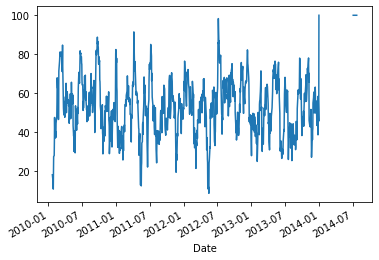

In [34]:
rsi_values.rsi.plot()

In [ ]:
### RSI Signal generation


In [37]:
rsi = get_rsi(data, 14)

In [38]:
rsi.head()

,price,rsi
Date,,
2010-01-04,442.267761,NaN
2010-01-05,443.772614,NaN
2010-01-06,445.906067,NaN
2010-01-07,437.604248,NaN
2010-01-08,429.980499,NaN


In [40]:
buy_threshold = 20
sell_threshold = 80

In [41]:
signals = pd.DataFrame(index=rsi.index)
signals['price'] = rsi['price'] 
signals['rsi'] = rsi['rsi']
signals['buy']= 0.0
signals['sell']= 0.0
signals['buy'] = np.where(signals['rsi'] < buy_threshold, -1.0, 0.0)
signals['sell'] = np.where(signals['rsi'] > sell_threshold, 1.0, 0.0)
signals['buy'] = signals['buy'].diff()
signals['sell'] = signals['sell'].diff()
signals.loc[signals['buy']==-1.0,['buy']] = 0 
signals.loc[signals['sell']== 1.0,['sell']] = 0 
signals['buy_sell'] = signals['buy'] + signals['sell']

<AxesSubplot:xlabel='Date'>

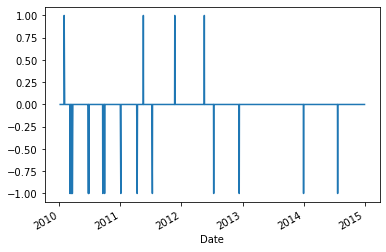

In [42]:
signals.buy_sell.plot()

In [44]:
def get_rsi_signal(rsi, buy_threshold = 20, sell_threshold = 80):
    """
    RSI buy sell signal calculation
    Input:
    data: data frame with rsi indicator values
    buy_threshold: threshold for getting buy signal
    sell_threshold: threshold for getting sell signal
    Output: data frame with buy and sell signal
    """
    signals = pd.DataFrame(index=rsi.index)
    signals['price'] = rsi['price'] 
    signals['rsi'] = rsi['rsi']
    signals['buy']= 0.0
    signals['sell']= 0.0
    signals['buy'] = np.where(signals['rsi'] < buy_threshold, -1.0, 0.0)
    signals['sell'] = np.where(signals['rsi'] > sell_threshold, 1.0, 0.0)
    signals['buy'] = signals['buy'].diff()
    signals['sell'] = signals['sell'].diff()
    signals.loc[signals['buy']==-1.0,['buy']]=0 
    signals.loc[signals['sell']== 1.0,['sell']]=0 
    signals['buy_sell'] = signals['buy'] + signals['sell']
    return signals[['price','buy_sell']]

In [45]:
signals = get_rsi_signal(rsi, buy_threshold = buy_threshold, sell_threshold= sell_threshold)

In [46]:
signals.head()

,price,buy_sell
Date,,
2010-01-04,442.267761,NaN
2010-01-05,443.772614,0.0
2010-01-06,445.906067,0.0
2010-01-07,437.604248,0.0
2010-01-08,429.980499,0.0


### Plot RSI buy sell signal

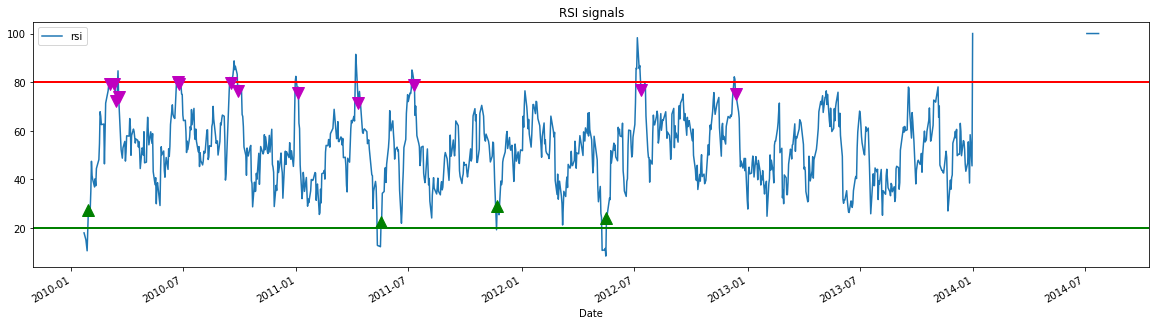

In [47]:
    graph = plt.figure(figsize=(20,5))
    ax2 = graph.add_subplot(1,1,1)
    rsi[['rsi']].plot(ax=ax2,title = 'RSI signals')
    ax2.axhline(y= 20, color = "g", lw = 2.)
    ax2.axhline(y= 80, color = "r", lw = 2.)
    ax2.plot(signals.loc[signals.buy_sell == 1].index, rsi.rsi[signals.buy_sell == 1],"^", markersize = 12, color ='g')
    ax2.plot(signals.loc[signals.buy_sell == -1].index, rsi.rsi[signals.buy_sell == -1],"v", markersize = 12, color ='m')
    # plt.show()
    plt.show()

In [49]:
def plot_rsi_buy_sell(rsi, signals, buy_threshold = 20, sell_threshold = 80):
    """
    Plot rsi with buy and sell signal
    """
    graph = plt.figure(figsize=(20,5))
    ax2 = graph.add_subplot(1,1,1)
    rsi[['rsi']].plot(ax=ax2,title = 'RSI signals')
    ax2.axhline(y= buy_threshold, color = "g", lw = 2.)
    ax2.axhline(y= sell_threshold, color = "r", lw = 2.)
    ax2.plot(signals.loc[signals.buy_sell == 1].index, rsi.rsi[signals.buy_sell == 1],"^", markersize = 12, color ='g')
    ax2.plot(signals.loc[signals.buy_sell == -1].index, rsi.rsi[signals.buy_sell == -1],"v", markersize = 12, color ='m')
    # plt.show()
    plt.show()

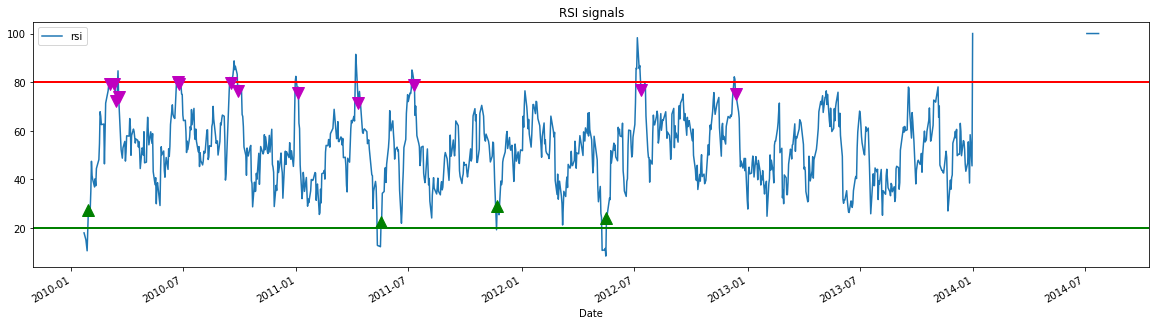

In [52]:
plot_rsi_buy_sell(rsi_values, signals)